In [ ]:
Question 1:
 
A retail store wants to identify customers who make frequent purchases. Given the dataset below, write a code to:
1.	Group customers by their IDs.
2.	Calculate the total number of purchases per customer.
3.	Identify the top 3 frequent customers.
Dataset:
data = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
        'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}

Expected Output:

Total Purchases per Customer:
   Customer_ID  Purchase_Amount
0          101              520
1          102              600
2          103              480
3          104              300
4          105              400

Top 3 Frequent Customers:
   Customer_ID  Purchase_Amount
1          102              600
0          101              520
2          103              480


In [16]:
import pandas as pd
data = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
        'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}
dataset=pd.DataFrame(data)
total_purchase=(dataset.groupby('Customer_ID')['Purchase_Amount']).sum().reset_index()
print("Total Purchases per Customer: \n",total_purchase)
top=total_purchase.sort_values(by='Purchase_Amount', ascending=False).head(3)
print("Top 3 Frequent Customers:: \n",top)

Total Purchases per Customer: 
    Customer_ID  Purchase_Amount
0          101              520
1          102              600
2          103              480
3          104              300
4          105              400
Top 3 Frequent Customers:: 
    Customer_ID  Purchase_Amount
1          102              600
0          101              520
2          103              480


In [ ]:
Question 2:
A company tracks the daily sales of a product over a month. You are tasked with identifying any abnormal sales data using the IQR (Interquartile Range) method.
Dataset (Daily Sales in Units):

data = {'Day': range(1, 31),
        'Sales': [25, 30, 28, 45, 55, 60, 22, 80, 95, 120,
                  33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
                  30, 34, 31, 33, 36, 42, 44, 48, 90, 200]}

Tasks:
1. Calculate the Q1 (25th percentile) and Q3 (75th percentile).
2. Determine the IQR.
3. Identify the Lower Bound and Upper Bound.
4. Detect and display the outliers.
5. Replace the Outliers with the Median Value.
Expected Output:
Q1: 31.5, Q3: 83.75, IQR: 52.25
Lower Bound: -46.875, Upper Bound: 162.125
Outliers Detected:
    Day  Sales
29   30    200
Data After Replacing Outliers with Median:
    Day  Sales
0     1   25.0
1     2   30.0
2     3   28.0
3     4   45.0
4     5   55.0
5     6   60.0
6     7   22.0
7     8   80.0
8     9   95.0
9    10  120.0
10   11   33.0
11   12   29.0
12   13   27.0
13   14   35.0
14   15   40.0
15   16   50.0
16   17   85.0
17   18  110.0
18   19  105.0
19   20   92.0
20   21   30.0
21   22   34.0
22   23   31.0
23   24   33.0
24   25   36.0
25   26   42.0
26   27   44.0
27   28   48.0
28   29   90.0
29   30   43.0


In [37]:
import pandas as pd
data = {'Day': range(1, 31),
        'Sales': [25, 30, 28, 45, 55, 60, 22, 80, 95, 120,
                  33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
                  30, 34, 31, 33, 36, 42, 44, 48, 90, 200]}
dataset=pd.DataFrame(data)
q1=dataset['Sales'].quantile(0.25)
q3=dataset['Sales'].quantile(0.75)
iqr=q3-q1
print("Q1: ",q1,"   Q3:",q3,"  IQR:",iqr)
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
print("Lower Bound:",lb,"    Upper Bound",ub)
df_outlier=dataset[(dataset['Sales']<lb)| (dataset['Sales']>ub)]
print("Outliers detected:")
print(df_outlier)
med=dataset['Sales'].median()
dataset['Sales']=dataset['Sales'].replace(200,ub)
print("Data After Replacing Outliers with Median:")
dataset

Q1:  31.5    Q3: 83.75   IQR: 52.25
Lower Bound: -46.875     Upper Bound 162.125
Outliers detected:
    Day  Sales
29   30    200
Data After Replacing Outliers with Median:


,Day,Sales
0,1,25.000
1,2,30.000
2,3,28.000
3,4,45.000
4,5,55.000
5,6,60.000
6,7,22.000
7,8,80.000
8,9,95.000
9,10,120.000


In [ ]:
Question 3:
 
A pharmaceutical company is testing the effectiveness of a new drug to reduce blood pressure. Two groups of patients were selected:
Group 1 (Treatment): Received the drug
Group 2 (Control): Received a placebo
The company wants to check if there is a significant difference in the blood pressure levels between the two groups using an Independent T-Test.
Dataset:
data = {'Group': ['Treatment']*10 + ['Control']*10,
        'Blood_Pressure': [120, 115, 118, 123, 122, 119, 124, 117, 116, 121,
                            130, 135, 140, 138, 142, 136, 139, 134, 137, 141]}
Tasks:
1.	Perform an Independent T-Test.
2.	State the null and alternative hypotheses.
3.	Calculate the p-value.
4.	Conclude whether the drug has a significant effect.
Expected Output:
T-Statistic: -11.870553692962726
P-Value: 6.008066605173374e-10
Reject the Null Hypothesis: The drug has a significant effect.


In [4]:
import pandas as pd
from scipy.stats import ttest_ind
data = {'Group': ['Treatment']*10 + ['Control']*10,
        'Blood_Pressure': [120, 115, 118, 123, 122, 119, 124, 117, 116, 121,
                            130, 135, 140, 138, 142, 136, 139, 134, 137, 141]}
dataset=pd.DataFrame(data)
treat=dataset[dataset['Group']=='Treatment']['Blood_Pressure']
cont=dataset[dataset['Group']=='Control']['Blood_Pressure']
tt,pv=ttest_ind(treat,cont)
print("T-Statistic: ",tt)
print("P-Value:",pv)
if(pv<0.05):
    print("Accept the Null Hypothesis: The drug has no significant effect.")
else:
    print("Reject the Null Hypothesis: The drug has a significant effect.")

T-Statistic:  -11.870553692962726
P-Value: 6.008066605173374e-10
Accept the Null Hypothesis: The drug has no significant effect.


In [ ]:
Question 4:
GlobalMart is a large retailer conducting advertisement campaigns in different regions. The company spends money on two types of advertisements: TV Ads and Social Media Ads
They want to analyze how these ads influence their sales.
Your task is to calculate the Covariance and Correlation to determine which type of ad has a stronger impact on sales.
Tasks :
1.	Calculate the Covariance between ad budgets and sales to measure the direction of the relationship.
2.	Calculate the Correlation to measure the strength of the relationship.
3.	Determine which type of ad is more effective for increasing sales.
 
data in csv
    
Expected Output:
Covariance (TV vs Sales): 3625.0
Covariance (Social Media vs Sales): 3225.0
Correlation (TV vs Sales): 0.9958640886279954
Correlation (Social Media vs Sales): 0.9724846021568381
TV Ads have a stronger impact on Sales.



In [12]:
import pandas as pd
dataset=pd.read_csv('globalmart.csv')
covTS=dataset['TV_Ad_Budget'].cov(dataset['Sales'])
print("Covariance (TV vs Sales): ", covTS)
covSS=dataset['Social_Media_Budget'].cov(dataset['Sales'])
print("Covariance (Social Media vs Sales): ", covSS)
corTS=dataset['TV_Ad_Budget'].corr(dataset['Sales'])
print("Covariance (TV vs Sales): ", corTS)
corSS=dataset['Social_Media_Budget'].corr(dataset['Sales'])
print("Covariance (Social Media vs Sales): ", corSS)
if(corTS>corSS):
    print("TV Ads have a stronger impact on Sales.")
else:
    print("Social Ads have a stronger impact on Sales.")

Covariance (TV vs Sales):  3625.0
Covariance (Social Media vs Sales):  3225.0
Covariance (TV vs Sales):  0.9958640886279954
Covariance (Social Media vs Sales):  0.9724846021568381
TV Ads have a stronger impact on Sales.


In [ ]:
Question 5:
A company tracks the delivery time (in minutes) for its online orders. You are given the delivery times for 50 orders.
●	Calculate the mean and standard deviation of the delivery times.
●	Plot the Probability Density Function (PDF) to visualize the distribution.
Dataset (Delivery Times in Minutes):
 
[25, 30, 28, 45, 55, 60, 22, 80, 95, 120, 33, 29, 27, 35, 40, 50, 85, 110, 105, 92, 30, 34, 31, 33, 36, 42, 44, 48, 90, 200, 20, 25, 27, 32, 38, 41, 47, 58, 62, 77, 80, 84, 90, 110, 123, 145, 150, 160]
You can try implementing this using libraries like numpy, matplotlib, and scipy
Expected Output:

Mean Delivery Time: 65.0625
Standard Deviation of Delivery Time: 41.718504212759115


Mean Delivery Time: 65.0625
Standard Deviation of Delivery Time: 41.718504212759115


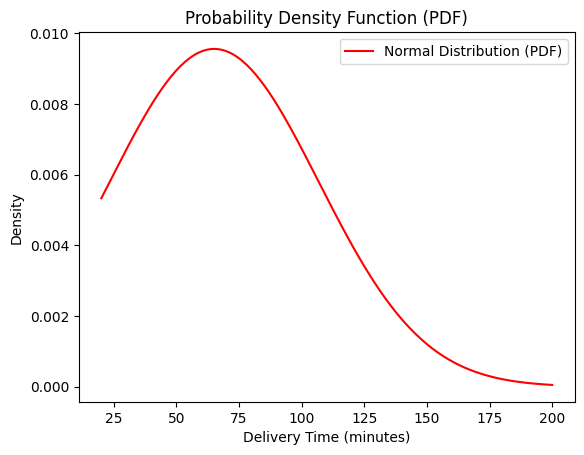

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
data = np.array([25, 30, 28, 45, 55, 60, 22, 80, 95, 120, 33, 29, 27, 35, 40, 50, 85,110, 105, 92, 30, 34, 31, 33, 36, 42, 44, 48, 90, 200, 20, 25, 27, 32,38, 41, 47, 58, 62, 77, 80, 84, 90, 110, 123, 145, 150, 160])
mean = np.mean(data)
std = np.std(data)
print("Mean Delivery Time:", mean)
print("Standard Deviation of Delivery Time:", std)
x = np.linspace(min(data), max(data), 200)
pdf = norm.pdf(x, mean, std)
plt.plot(x, pdf, color='red', label='Normal Distribution (PDF)')
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF)")
plt.legend()
plt.show()